In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/12U_ExotrailM+_PerpendicularLifetime.txt'
path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/12U_ExotrailM+_Lifetime.txt'

# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_Perpendicular.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_MidSFU.txt'
# path_to_txt = 'C:/Users/egeme/Desktop/Kuva/GMAT_OrbitalSims/LTDN1030/12U/12U_350/Exotrail/Detailed/16U_Exotrail_LifetimeL_LowSFU.txt'

dataset = pd.read_fwf(path_to_txt)

In [31]:
filename = path_to_txt.split('/')[-1].split('_')

if filename[0] == '12U':
    satellite_mass = 20
else:
    satellite_mass = 25

In [32]:
filename

['12U', 'ExotrailM+', 'Lifetime.txt']

In [33]:
elapsed_days = dataset['SC.ElapsedDays'].values.tolist()
alt_list = dataset['SC.Earth.Altitude'].values.tolist()
fuel_qty = dataset['SC.ElectricTank1.FuelMass'].values.tolist()
sma_list = dataset['SC.Earth.SMA'].values.tolist()
ecc_list = dataset['SC.Earth.ECC'].values.tolist()
inc_list = dataset['SC.EarthMJ2000Eq.INC'].values.tolist()


number_of_burns = dataset['Number_Of_Burns'].values.tolist()
burn_durations = dataset['BurnDur550'].values.tolist()


changelist = [i for i in range(1,len(fuel_qty)) if fuel_qty[i]!=fuel_qty[i-1] ]

# Drag area during descent, %20 duty cycle
# Drag area during mission, full streamlined

# Exotrail L, 0.7kg fuel mass
# Exotrail M+, 0.4kg fuel mass
# 2.5e-3 N, 800s Isp

# SFU
# Low = 130 
# Mid  = 160
# Default = 190

In [5]:
changelist[0]
sma_list[changelist[0]]

6728.008141148672

In [34]:
print('Simulation Duration:', round(max(elapsed_days),2),'days')
print('Time from deployment to mission altitude:', round(elapsed_days[changelist[1]],2),'days')
print('Time spent on mission altitude:', round(elapsed_days[changelist[-1]]-elapsed_days[changelist[0]],2),'days')
print('Decay time after misson:', round(max(elapsed_days)-elapsed_days[changelist[-1]],2),'days\n')

print('Satellite wet mass:', satellite_mass,'kg')
print('Satellite dry mass', satellite_mass-max(fuel_qty),'kg\n')

print('Max Δv provided by the thruster:', round(800*9.81*np.log(satellite_mass/(satellite_mass-max(fuel_qty))),2),'m/s')
print('Number of Burns:', max(number_of_burns))
print('Longest burn duration:', round(max(burn_durations),2),'s')
print('Shortest burn duration:', round(min(burn_durations[changelist[0]:]),2),'s')
print('Average burn duration:', round(mean(burn_durations[changelist[0]:]),2),'s')
print('Burn frequency:', round( max(number_of_burns) / (elapsed_days[changelist[-1]]-elapsed_days[changelist[0]]) ,2),'burns per day')


Simulation Duration: 976.2 days
Time from deployment to mission altitude: 88.17 days
Time spent on mission altitude: 734.95 days
Decay time after misson: 153.09 days

Satellite wet mass: 20 kg
Satellite dry mass 19.6 kg

Max Δv provided by the thruster: 158.55 m/s
Number of Burns: 832
Longest burn duration: 1916.57 s
Shortest burn duration: 1192.2 s
Average burn duration: 1506.57 s
Burn frequency: 1.13 burns per day


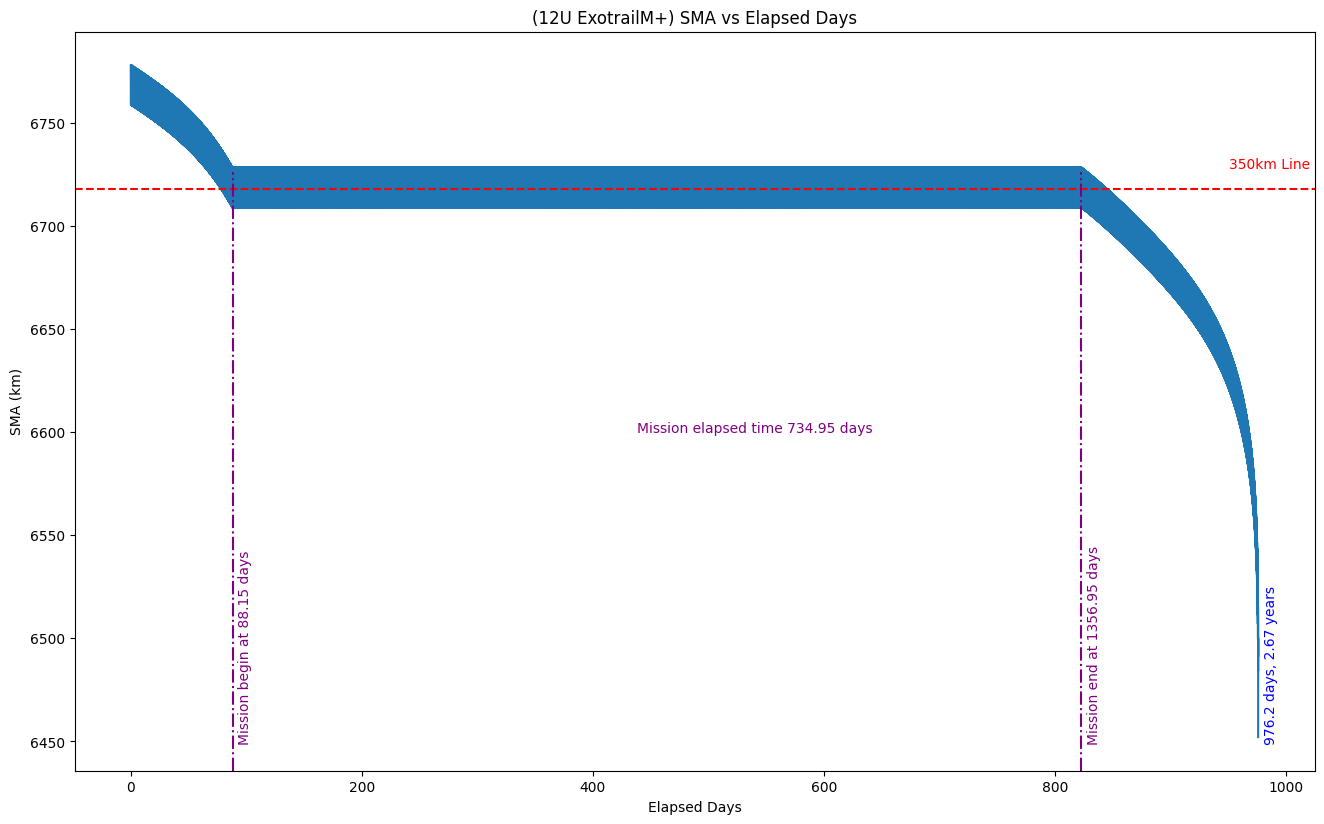

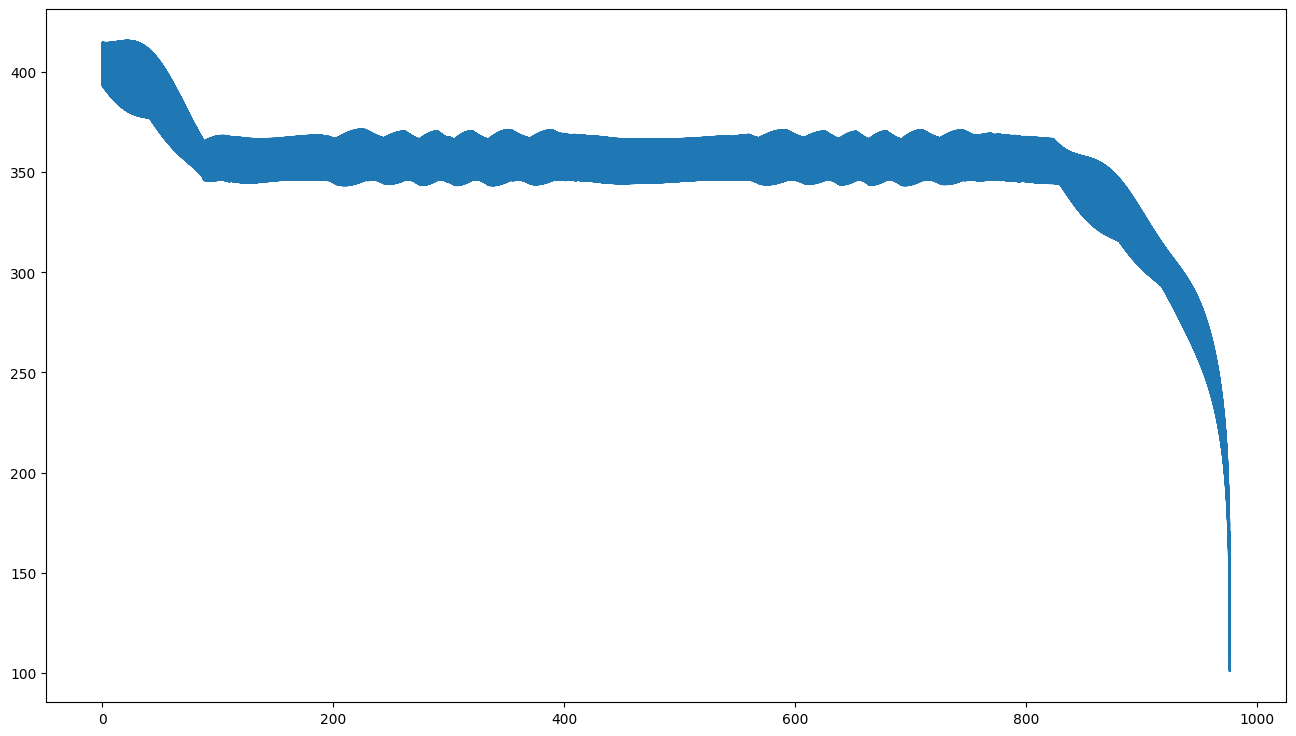

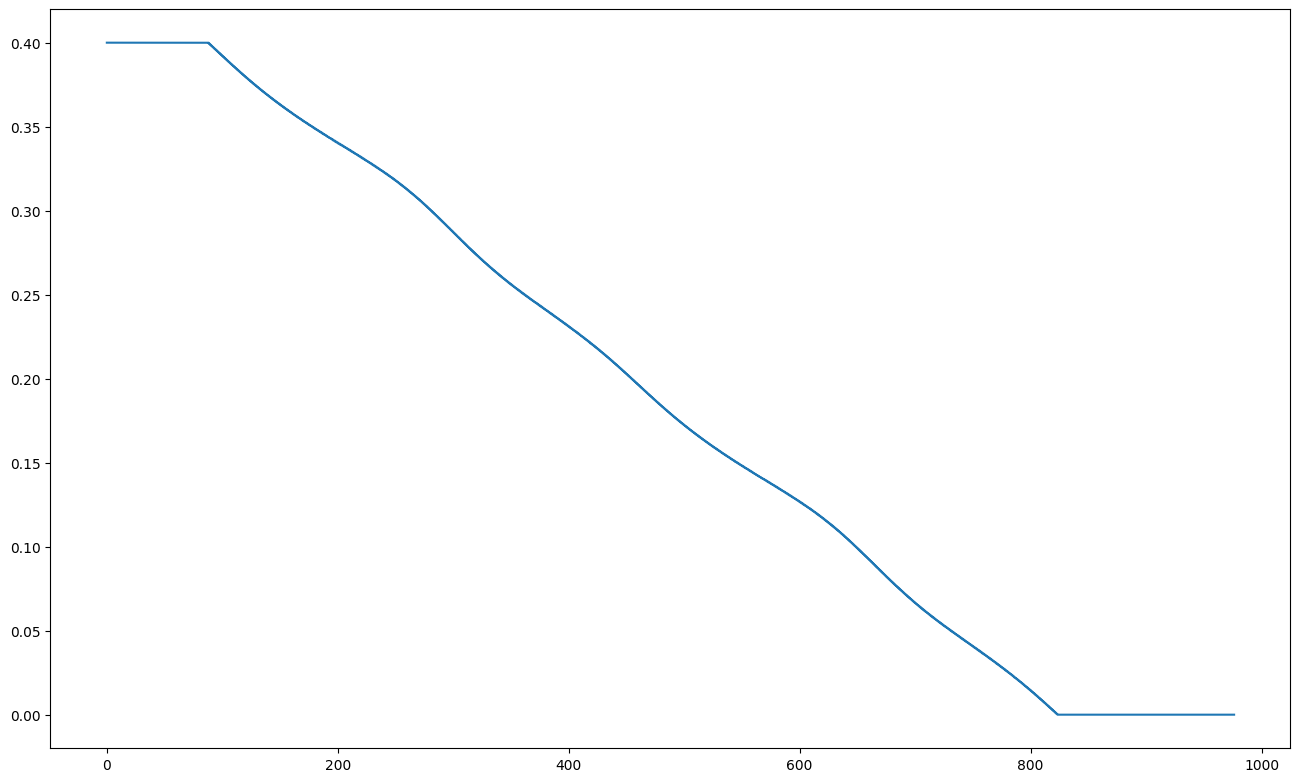

In [38]:
max_lenght = round(max(elapsed_days),2)
message = str(max_lenght) + ' days, ' + str(round(max_lenght/365,2)) +' years'
missiontime = 'Mission elapsed time ' + str(round(elapsed_days[changelist[-1]]-elapsed_days[changelist[0]],2)) + ' days'

plt.figure(figsize=(16,9.6))

plt.title(f'({filename[0]} {filename[1]}) SMA vs Elapsed Days')
plt.ylabel('SMA (km)')
plt.xlabel('Elapsed Days')
plt.plot(elapsed_days,sma_list)
plt.text(elapsed_days[-1]+5,6450,message,color='b', rotation=90)

plt.axhline(350+6368.14, color='r', linestyle='--')
plt.text(elapsed_days[-1]-25,360+6368.14, '350km Line', color='red')

plt.axvline(elapsed_days[changelist[0]],0,0.81,color='purple',linestyle='-.')
plt.axvline(elapsed_days[changelist[-1]], 0,0.81,color='purple',linestyle='-.')

# plt.axhline(6378.14,0,color='black')


plt.text((elapsed_days[-1]+elapsed_days[0])/2-50,6600, missiontime, color='purple')
plt.text(elapsed_days[changelist[0]]+5, 6450, 'Mission begin at 88.15 days' ,color='purple',rotation=90 )
plt.text(elapsed_days[changelist[-1]]+5, 6450, 'Mission end at 1356.95 days' ,color='purple',rotation=90 )
plt.show()

fig = plt.figure(figsize=(16,9))
# plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,alt_list)
# plt.axhline(100,0,color='black',linestyle='dotted')
plt.show()

plt.figure(figsize=(16,9.6))
plt.plot(elapsed_days,fuel_qty)
plt.show()
